In [181]:
import numpy as np

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [183]:
class0_len = 1000
X0 = np.random.normal((0,1,2), (1,2,2), (class0_len,3))
y0 = [0]*class0_len

class1_len = 2000
X1 = np.random.normal((1,1,-1), (3,1,1), (class1_len, 3))
y1 = [1]*class1_len

In [184]:
X = np.concatenate((X0, X1))
y = y0+y1

In [185]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=24)

In [186]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_val, y_val))

0.9244444444444444
0.9306666666666666


In [187]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

In [188]:
tp, fp, tn, fn = perf_measure(y_val, gnb.predict(X_val))

In [189]:
print('accuracy: ', (tp+tn)/len(y_val))

accuracy:  0.9306666666666666


In [190]:
print('precision: ', (tp)/(tp+fp))

precision:  0.9376218323586745


In [191]:
print('recall: ', (tp)/(tp+fn))

recall:  0.9600798403193613


In [192]:
print('sensitivity: ', (tp)/(tp+fn))

sensitivity:  0.9600798403193613


In [193]:
print('specificity: ', (tn)/(fp+tn))

specificity:  0.8714859437751004


In [209]:
def print_metrics(tp, fp, tn, fn):
#     print('accuracy: ', (tp+tn)/(tp+tn+fp+fn))
    print('precision: ', (tp)/(tp+fp))
    print('recall: ', (tp)/(tp+fn))
    print('sensitivity: ', (tp)/(tp+fn))
    print('specificity: ', (tn)/(fp+tn))

lets try to find drawbacks here

In [210]:
print_metrics(9900, 100, 0, 0)

precision:  0.99
recall:  1.0
sensitivity:  1.0
specificity:  0.0


## HOMEWORK: think of example when all 4 metrics are high, but model is bad

# F1-Score

<img src="files/f1score.png">

In [211]:
print('F1-Score: ', (tp)/(tp+(fp+fn)/2))

F1-Score:  0.9487179487179487


# ROC Curve, AUC

<img src="files/roc_curve.jpeg">

In [ ]:
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)

In [212]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [213]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [214]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [216]:
# calculate score
lr_auc = roc_auc_score(testy, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

Logistic: ROC AUC=0.903


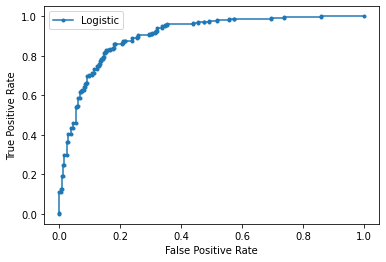

In [217]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

implement roc_auc_score and roc_curve functions on your own

In [ ]:
def roc_curve(testy, lr_probs):
    return fpr, tpr

def roc_auc_score(testy, lr_probs):
    return auc